<a href="https://colab.research.google.com/github/palak-chaturvedi/100DaysOfCode/blob/master/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
data = ("heart.csv")
raw_df = pd.read_csv(data, sep=',')
raw_df.head()
raw_df.shape
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
raw_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
raw_df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
528,49,M,NAP,131,142,0,Normal,127,Y,1.5,Flat,1
374,61,M,ASY,125,0,0,Normal,105,Y,0.0,Down,1
428,62,M,ASY,110,0,0,Normal,120,Y,0.5,Flat,1
142,47,M,ASY,160,291,0,ST,158,Y,3.0,Flat,1
278,57,F,ASY,180,347,0,ST,126,Y,0.8,Flat,0
257,36,M,NAP,150,160,0,Normal,172,N,0.0,Up,0
552,71,M,NAP,144,221,0,Normal,108,Y,1.8,Flat,1
662,44,M,ASY,110,197,0,LVH,177,N,0.0,Up,1
118,35,F,TA,120,160,0,ST,185,N,0.0,Up,0
172,53,M,ATA,140,320,0,Normal,162,N,0.0,Up,0


In [5]:
raw_df_copy = raw_df.copy()
raw_df_copy

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [6]:
raw_df_copy.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
raw_df_copy.Age


0      40
1      49
2      37
3      48
4      54
       ..
913    45
914    68
915    57
916    57
917    38
Name: Age, Length: 918, dtype: int64

In [8]:
# Adding age group column to dataframe and naming it AgeGroup
raw_df_copy['AgeGroup'] = pd.cut(raw_df_copy['Age'], bins = [18,30,40,50,60,70,80,100], include_lowest = True, labels = ['18-30','30-40','40-50','50-60','60-70','70-80','80-100'])
raw_df_copy

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,30-40
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,40-50
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,30-40
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,40-50
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,40-50
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,60-70
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,50-60
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,50-60


In [9]:
raw_df_copy.AgeGroup


0      30-40
1      40-50
2      30-40
3      40-50
4      50-60
       ...  
913    40-50
914    60-70
915    50-60
916    50-60
917    30-40
Name: AgeGroup, Length: 918, dtype: category
Categories (7, object): ['18-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70-80' < '80-100']

(array([ 88.,   0., 223.,   0., 381.,   0., 197.,   0.,   5.,  24.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

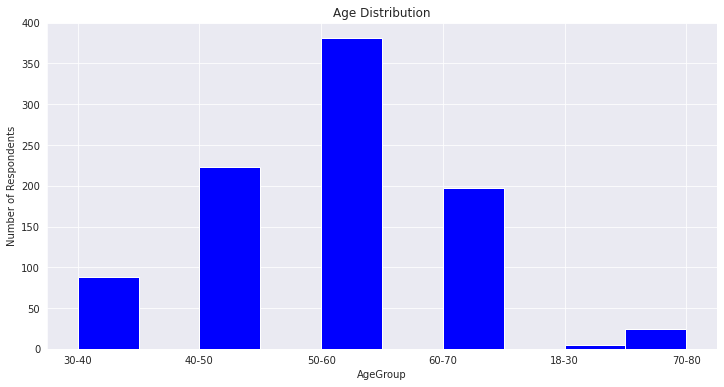

In [10]:
plt.figure(figsize=(12, 6))
plt.title('Age Distribution')
plt.xlabel('AgeGroup')
plt.ylabel('Number of Respondents')
plt.hist(raw_df_copy.AgeGroup, color='blue')

In [11]:
gender = raw_df_copy.Sex.value_counts(dropna=False)
gender

M    725
F    193
Name: Sex, dtype: int64

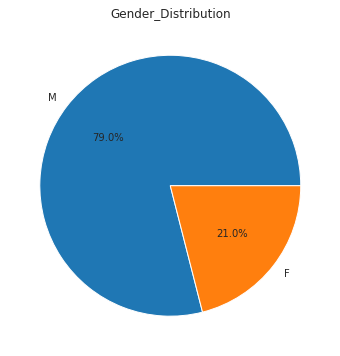

In [12]:
plt.figure(figsize=(12,6))
plt.title('Gender_Distribution')
plt.pie(gender,labels=gender.index, autopct ='%1.1f%%');

In [13]:
type_chestpain = raw_df_copy.ChestPainType.value_counts(dropna=False)
type_chestpain

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

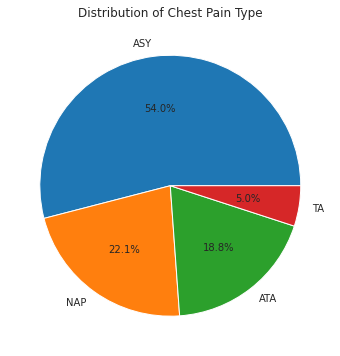

In [14]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Chest Pain Type')
plt.pie(type_chestpain,labels=type_chestpain.index, autopct ='%1.1f%%');

In [15]:
### Replacing numberic responds to yes or no to make it easy to understand when graphed.
raw_df_copy['HeartDisease'] = raw_df_copy['HeartDisease'].replace([0,1,...],['No','Yes',...])
raw_df_copy

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,No,30-40
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,Yes,40-50
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,No,30-40
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,Yes,40-50
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,No,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,Yes,40-50
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,Yes,60-70
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,Yes,50-60
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,Yes,50-60


In [16]:
heart_disease = raw_df_copy.HeartDisease.value_counts(dropna=False)
heart_disease

Yes    508
No     410
Name: HeartDisease, dtype: int64

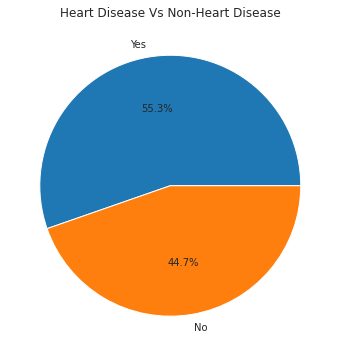

In [17]:
plt.figure(figsize=(12,6))
plt.title('Heart Disease Vs Non-Heart Disease')
plt.pie(heart_disease,labels=heart_disease.index, autopct ='%1.1f%%');

Text(0.5, 1.0, 'Cholesterol Level Among Age Groups')

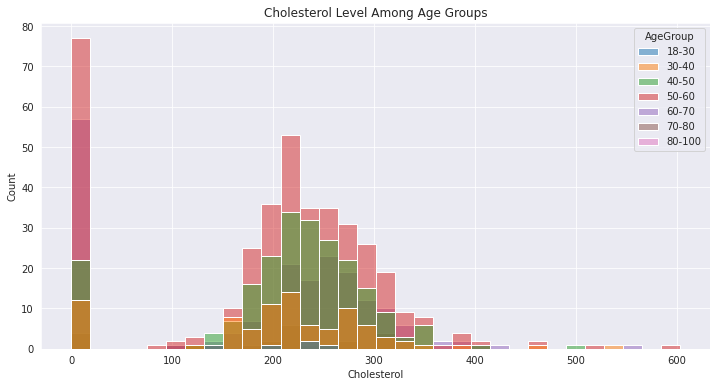

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(data=raw_df_copy, x="Cholesterol", hue="AgeGroup")
plt.title("Cholesterol Level Among Age Groups")

Text(0.5, 1.0, 'Reported Chest Pain Type Among Gender')

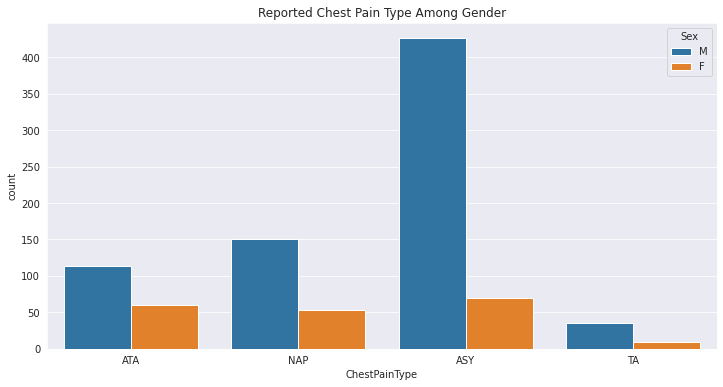

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(data=raw_df_copy, x="ChestPainType", hue="Sex")
plt.title("Reported Chest Pain Type Among Gender")

Text(0.5, 1.0, 'Distribution of Gender and Heart Disease')

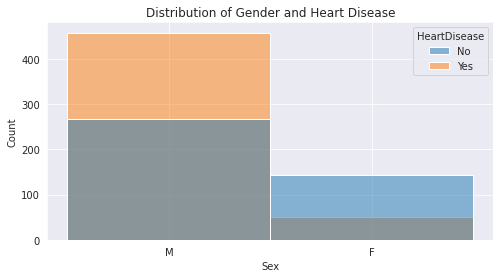

In [20]:
plt.figure(figsize=(8,4))
sns.histplot(raw_df_copy, x="Sex", hue="HeartDisease")
plt.title("Distribution of Gender and Heart Disease")

Text(0.5, 1.0, 'Distribution of Age Group and Heart Disease')

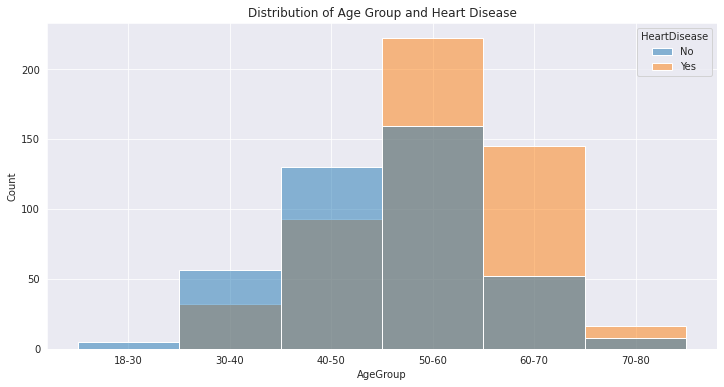

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(raw_df_copy, x="AgeGroup", hue="HeartDisease")
plt.title("Distribution of Age Group and Heart Disease")

Text(0.5, 1.0, 'Correlation Heatmap')

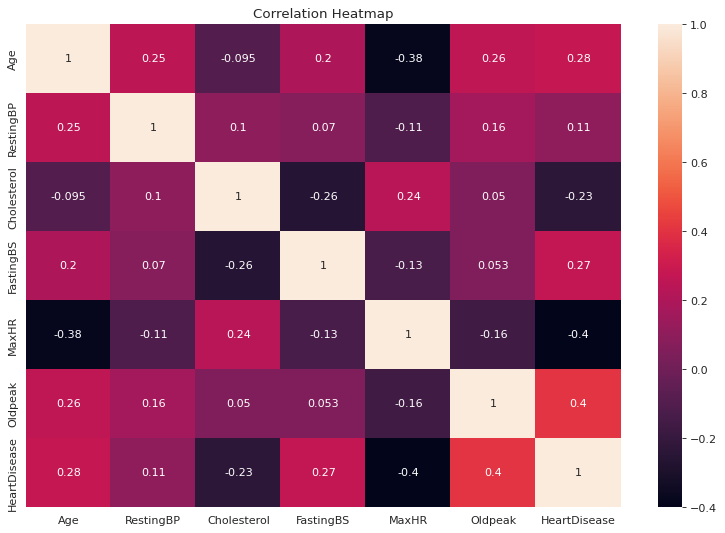

In [22]:
df=list(['AgeGroup','Sex','ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease'])


plt.figure(figsize=(12, 8), dpi=80)
sns.heatmap(data=raw_df.corr(), annot=True)
plt.title("Correlation Heatmap")

Text(0.5, 1.0, 'Effect of Cholesterol on Heart Disease')

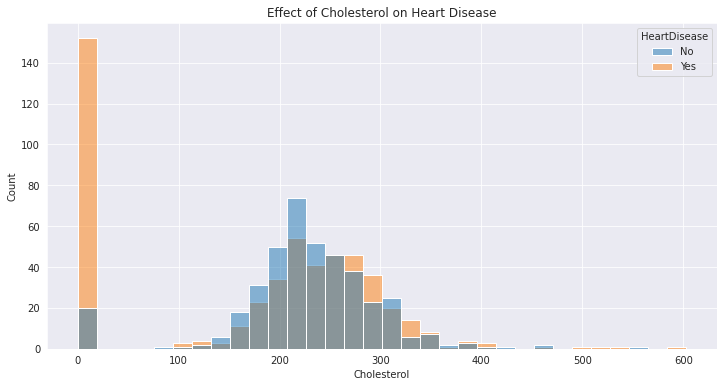

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(raw_df_copy, x="Cholesterol", hue="HeartDisease")
plt.title("Effect of Cholesterol on Heart Disease")

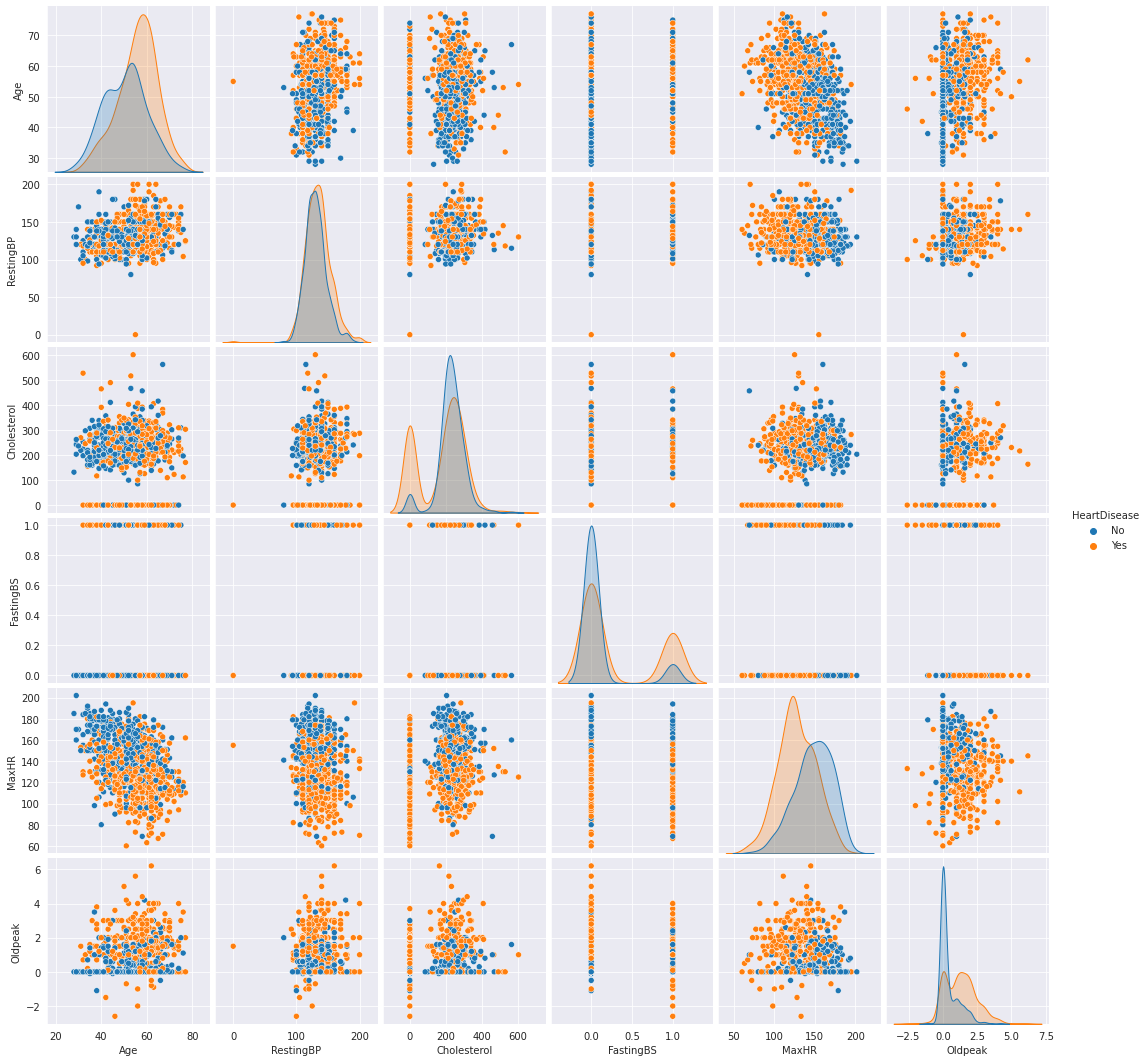

In [24]:
#### Using pairplot to see how other variables affect heart disease.
sns.pairplot(raw_df_copy,hue="HeartDisease");